In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def smoothing(list_, n_smooth=500):
    smoothed_list_ = []
    for i in range(len(list_)):
        if i < n_smooth:
            #smoothed_list_.append(np.mean(list_[:i+1]))
            smoothed_list_.append(np.mean(list_[:n_smooth]))
        else:
            smoothed_list_.append(np.mean(list_[i-n_smooth:i+1]))
    return smoothed_list_            


def plot_graph(x_values, y_values, color_, title_, xlabel_=None, ylabel_=None, label_=None):
    if label_ is None:
        plt.plot(x_values, y_values, c=color_)
    else:
        plt.plot(x_values, y_values, c=color_, label=label_)
        plt.legend(loc=(1.02,0.0))
    if xlabel_ is not None:
        plt.xlabel(xlabel_)
    if ylabel_ is not None:
        plt.ylabel(ylabel_)
    plt.title(title_)
    plt.grid(True)

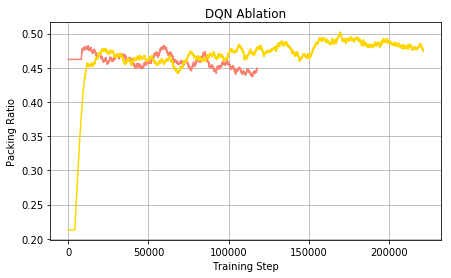

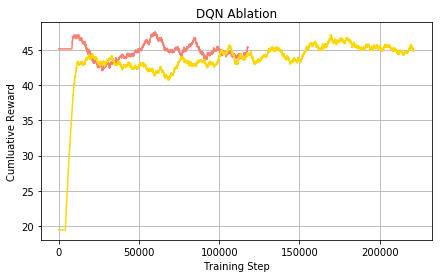

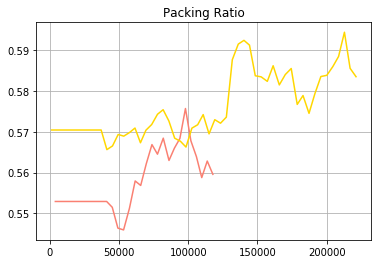

In [14]:
result_dir = "./results/board/"
model_list = ["DQN_1129_1719", "DQN_1130_0302"]
color_list = ["salmon", "gold", "darkseagreen", "cornflowerblue", "mediumorchid"]

label_list = [None]*len(model_list)
# label_list = [
#     "DQN + B-Mask + F-Mask + Act-Proj + Coord-Conv",
#     "DQN + B-Mask + F-Mask + Act-Proj",
#     "DQN + B-Mask + F-Mask",
#     "DQN + B-Mask",
#     "DQN"
#  ]


plt.figure(figsize=(7,4))


for model_idx, model_name in enumerate(model_list):
    result_file = result_dir + model_name + ".npy"
    result_ = np.load(result_file, allow_pickle=True)
    
    testlens_ = result_[2]
    testlens_ = smoothing(testlens_)
    
    eplens_ = result_[1]
    cumlens_ = np.cumsum(eplens_)
    
    max_steps = int(5e5)
    if cumlens_[-1] > max_steps:
        last_idx = np.sum(np.where(cumlens_<max_steps, 1, 0))
        testlens_ = testlens_[:last_idx]
        cumlens_ = cumlens_[:last_idx]
    
    plot_graph(cumlens_, testlens_, color_list[model_idx],
               "DQN Ablation", xlabel_="Training Step", ylabel_="Packing Ratio", label_=label_list[model_idx])
plt.show()


plt.figure(figsize=(7,4))

for model_idx, model_name in enumerate(model_list):
    result_file = result_dir + model_name + ".npy"
    result_ = np.load(result_file, allow_pickle=True)
    
    testlens_ = result_[0]
    testlens_ = smoothing(testlens_)
    
    eplens_ = result_[1]
    cumlens_ = np.cumsum(eplens_)
    
    max_steps = int(5e5)
    if cumlens_[-1] > max_steps:
        last_idx = np.sum(np.where(cumlens_<max_steps, 1, 0))
        testlens_ = testlens_[:last_idx]
        cumlens_ = cumlens_[:last_idx]
    
    plot_graph(cumlens_, testlens_, color_list[model_idx],
               "DQN Ablation", xlabel_="Training Step", ylabel_="Cumluative Reward", label_=label_list[model_idx])
plt.show()


for model_idx, model_name in enumerate(model_list):
    result_file = result_dir + model_name + ".npy"
    result_ = np.load(result_file, allow_pickle=True)
    
    testlens_ = result_[5]
    testlens_ = smoothing(testlens_, 10)
    eplens_ = np.array(result_[6])
    
    max_steps = int(5e5)
    if eplens_[-1] > max_steps:
        last_idx = np.sum(np.where(eplens_<max_steps, 1, 0))
        testlens_ = testlens_[:last_idx]
        eplens_ = eplens_[:last_idx]
    
    plot_graph(eplens_, testlens_, color_list[model_idx], "Packing Ratio", label_=label_list[model_idx])
plt.show()

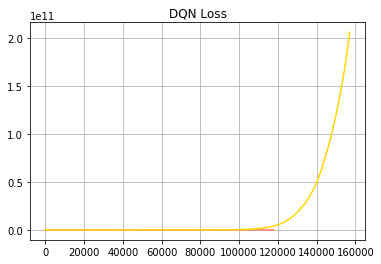

In [7]:
plt.figure(figsize=(6,4))

for model_idx, model_name in enumerate(model_list):
    result_file = result_dir + model_name + ".npy"
    result_ = np.load(result_file, allow_pickle=True)

    rewards_ = result_[0]
    losses_ = result_[3]

    eplens_ = result_[1]
    cumlens_ = np.cumsum(eplens_)
    
    max_steps = int(5e5)
    if cumlens_[-1] > max_steps:
        last_idx = np.sum(np.where(cumlens_<max_steps, 1, 0))
        losses_ = losses_[:last_idx]
        cumlens_ = cumlens_[:last_idx]

    
    smoothed_losses_ = smoothing(losses_)
    plot_graph(cumlens_, smoothed_losses_, color_list[model_idx], "DQN Loss")

    
plt.show()